In [39]:
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set 



<function seaborn.rcmod.set>

In [30]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)または(n_samples,)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード

    Retruns
    ----------
    for文で呼び出すと以下の2つを返す。最後のイテレーションでは、バッチサイズより小さいこともある。
    mini_X : 次の形のndarray, shape (batch_size, n_features)
      学習データのミニバッチ
    mini_y : 次の形のndarray, shape (batch_size, 1)または(batch_size,)
      正解値のミニバッチ
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        # ランダムに並べ換える
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X.iloc[shuffle_index]
        self.y = y.iloc[shuffle_index]
        self._counter = 0
        # イテレーション数を計算する
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        # len()が使われたときの処理
        return self._stop

    def __iter__(self):
        return self

    def __next__(self):
        # for文で呼ばれた際のループごとの処理
        if self._counter >= self._stop:
            # 最後まで進んだら終了
            self._counter = 0 # カウンターをリセット
            raise StopIteration()

        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [31]:
class SimpleInitializer:
    def __init__(self,sigma):
        self.sigma = 0.01
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn( n_nodes1, n_nodes2)
        return W
    

    def B(self, n_nodes2):
        """
    バイアスの初期化
    Parameters
    ----------
    n_nodes2 : int
      後の層のノード数

    Returns
    ----------
    B :
        """
        B = self.sigma * np.random.randn(n_nodes2,)
        return B

In [32]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        #重みのサンプル数分 shapeで割る
        
        layer.W -= self.lr *  layer.dW/layer.dW.shape[0]
        #バイアス項のサイズ感を注意
        #サンプル数、サンプル数で割る
        #　サンプル数を保持している変数
        layer.B -=  self.lr*layer.dB.mean()
        
        return layer

In [33]:
class Identity_function_MSE:
    def forward(self,y,pred):
        mse = np.mean((y-pred) **2)/2
        return mse
        
    def backwarod(self,y,pred):
        delta = y - pred
        return 


In [34]:
class identify_function_MSE:
    def forward(self,y,pred):
        return np.mean((y - pred) **2)/2
    def backwarod(self,y,pred):
        return y - pred

In [35]:
class tanh:
    
    def forward(self,x):
        self.A = np.tanh(x)
        return self.A
        
    def backward(self,x):
        
        return (1 - np.tanh(self.A)**2 )

# 全結合層のクラス化

In [36]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.n_nodes1 =  n_nodes1
        self.n_nodes2 = n_nodes2
        
        #引数として、initializerクラスのインスタンス変数とを受け取る、
        
        self.W = initializer.W(self.n_nodes1,self.n_nodes2)
        self.B  =initializer.B(self.n_nodes2,)
        self.X = None
        self.dW = None
        self.dB = None
        # 初期化
        
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """       
        self.X = X
        A = np.dot(X,self.W) + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        
        # 更新
        #全てのメンバ変数を
        #次に渡す勾配、この勾配をベースに、その層での重みやバイアス項が計算される
        dZ = np.dot(dA,self.W.T)
        
        #次に渡す重みのサイズ
        self.dW = np.dot(self.X.T,dA)
        
        #バッチ処理に対応したバイアス項
        self.dB =  dA
        #更新
        # self.optimizer.update(self)でも更新される
        self = self.optimizer.update(self)

        return dZ

#  Trainerクラス

In [37]:
class Trainer:
    def __init__(self, n_epochs, n_nodes1, n_nodes2, n_output,batch_size = 10,lr=0.001):
        self.n_epochs = n_epochs
        #バッチサイズ
        self.batch = batch_size 
        #学習率
        self.lr = lr
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = None
        #アトリビュート
        self.loss = []
        self.cost  = []
        self.valloss = []

    def fit(self,X_train,y_train):
        #特徴量を取得
        n_features = X_train.shape[1]
        gb = GetMiniBatch(X_train, y_train,batch_size=10)
        optimizer = SGD(self.lr)
        self.FC1 = FC(n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
        self.activation1 = tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
        self.activation2 = tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
        self.activation3 = Identity_function_MSE()
         
        for i in range(self.n_epochs):
            count = 0
            cost = 0
            for mini_X_train, mini_y_train in gb:
                #イテレーション毎のフォワード
                mini_y_train = mini_y_train[:,np.newaxis]

                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)       

                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                
                A3 = self.FC3.forward(Z2)

                Z3 = A3
                 
                loss = self.activation3.forward(Z3,mini_y_train)
                count += 1
                
                cost += loss
                self.loss.append(loss)
                #逆伝播で次に渡す勾配を計算
                dA3 = Z3 -  mini_y_train
                #全結合層の逆伝播
                dZ2 = self.FC3.backward(dA3)
                #活性化関数の層の逆伝播
                dA2 = self.activation2.backward(dZ2)
                
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない


        return self.loss
    


    
    def predict(self,X):
        # 1層目  ############################################
        print(self.FC1.dW.shape)
        rayer1_pre = np.dot(X, self.FC1.dW) 
        rayer1_out = np.tanh(rayer1_pre)

        # 2層目  ############################################
        rayer2_pre = np.dot(rayer1_out,  self.FC2.dW) 
        rayer2_out = np.tanh(rayer2_pre)

        # 3層目  ############################################
        pred = np.dot(rayer2_out, self.FC3.dW)

        return pred



In [38]:

X = pd.read_csv('train.csv')
y = X['SalePrice']
X = X.loc[:,['GrLivArea','YearBuilt']]

NameError: name 'pd' is not defined

In [35]:
y = np.log(y)

In [36]:
model = Trainer(10,300,100,1)

In [37]:
loss = model.fit(X,y)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


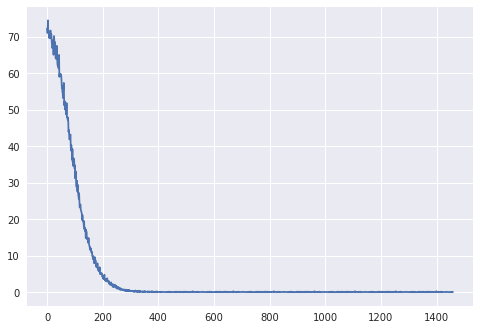

In [38]:
plt.plot(loss)
plt.show()

In [7]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))


# データの読み込み

In [4]:
mnist_dir = "mnist_data/"

In [5]:
mnist = fetch_mldata('MNIST original', data_home=mnist_dir)

In [8]:
# trainとtestに分割する
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.14285, shuffle=False)
# ラベルをint型にしておく
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

In [47]:
X_train[1].shape

(784,)

In [48]:
x = np.array([1, 2, 3, 4])
w = np.array([3, 5, 7])

a = np.empty((2, 3))

indexes0 = np.array([0, 1, 2]).astype(np.int)
indexes1 = np.array([1, 2, 3]).astype(np.int)


In [49]:
a[0] = x[indexes0]*w

In [55]:
 x[indexes0]

array([1, 2, 3])

In [54]:
a[0]

34.0

In [56]:
 x[indexes1]

array([2, 3, 4])

In [50]:
a[1] = x[indexes1]*w

In [53]:
a[1] 

49.0

In [51]:
a = a.sum(axis=1)

In [52]:
a

array([34., 49.])

In [ ]:
class SimpleConv1d:
    
    def forward():
        

In [10]:
# 　画像に対して畳み込みを行うことで、画像のある特徴を強めたり、弱めたりできる
#  局所性：各ピクセルが隣り合ったプクセルとにる

In [11]:
# 複数のチャンネル、複数のフィルタによるたたみこみ
#  各フィルタは入力画像と同じだけのチャンネルをもつ
# 各フィルタでチャンネルごとに畳み込みを行う
#  畳み込みによって生成された画像の各ピクセルにバイアスを足して、活性化関数で処理する
# バイアスの数とフィルタの数は同じになる

 プーリングとは
画像を各領域に区切り、各領域を代表する値を抽出する。
代表はマックスプーリングがよく使われる。
プーリングは画像をぼやかす処理なので、対象の位置が多少変わる
プーリングにより画像が小さくなるので、計算コストが」少ない


In [12]:
# CNN

In [513]:
def out_put(x_w,fit_w):
    out_size = (x_w - fit_w ) // 1+1
    return out_size

# SimpleConv1d

In [916]:
class SimpleConv1d:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    self.W : フィルター（重み)
    self.B : バイアス
    """
    def __init__(self):
        #引数として、initializerクラスのインスタンス変数とを受け取る、
                #フィルタとバイアスの初期値/
        
        self.W = np.array([3, 5, 7])
        self.B = np.array([1])
        self.pad = 0
        self.stride =1 
        self.delta_A = np.array([10, 20])

    
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """       
        A_list = []
        count = 0
        #1*3のフィルターを定義
        for i in range(0,X.shape[0]-1,self.stride):  
            #出力のセル１個分
            A = 0
            for s in range(self.W.shape[0]):  
                if i +s >= X.shape[0]:
                    return np.array(A_list)
                A += np.dot(X[i+s], self.W[s])
                #バイアス項を加算
            A +=self.B
            A_list.append(A)

            
    def backward(self, X):
        #Bの勾配を計算
        delta_B  = np.sum(self.delta_A, axis =0 ,keepdims=True)
        delta_W = []
        delta_X = []
        #Wの勾配を計算
        for i  in range(self.W.shape[0]):
            index = np.arange(i,i+2)
            delta_W.append(np.dot(self.delta_A, X[index]))
            
        #Xの勾配を計算
        for i  in range(X.shape[0]):
        #インデックスがXのはじめと、末尾のみ別の処理
            if i == 0 :
                delta_X.append(self.delta_A[i]*W[i])
            elif i == len(X)-1:
                delta_X.append(self.delta_A[i-2]*W[i-1])
            else:
                index = np.array([i,i-1])
                delta_X.append(np.dot(self.delta_A , self.W[index]))
        delta_W = np.array(delta_W)
        delta_X = np.array(delta_X)
        return  delta_B, delta_W, delta_X

In [918]:
model = SimpleConv1d()

In [920]:
model.forward(X).reshape(1,2)

array([[35, 50]])

In [859]:
model.backward(X)

(array([30]), array([ 50,  80, 110]), array([ 30, 110, 170, 140]))

In [855]:
np.arange(1,5,1)

array([1, 2, 3, 4])

In [850]:
A = np.zeros(222)

In [ ]:
X = np.array([1,2,3,4])

In [529]:
X.shape[0]

4

In [530]:
out = out_put(X.shape[0],3)

In [531]:
out

2